In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
#pyo.init_notebook_mode()

In [2]:
apps = pd.read_csv('data_cleaned.csv')

In [3]:
apps['Rating'].value_counts()

4.3    895
4.4    894
4.5    851
4.2    812
4.6    684
4.1    623
4.0    513
4.7    439
3.9    359
3.8    286
5.0    271
3.7    224
4.8    220
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     63
2.9     45
2.8     40
2.7     23
2.6     23
2.3     20
2.5     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     12
1.8      8
2.1      8
1.7      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

In [4]:
#remove the single record with Rating = 1.2 because the split into train and test doesn't support an y_class with only 1 record
apps = apps[apps['Rating'] != 1.2].reset_index(drop = True)

In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8196 non-null   object 
 1   Rating            8196 non-null   float64
 2   Reviews           8196 non-null   int64  
 3   Size              8196 non-null   float64
 4   Installs          8196 non-null   object 
 5   Price             8196 non-null   float64
 6   Content Rating    8196 non-null   object 
 7   Last Updated      8196 non-null   object 
 8   Current Ver       8196 non-null   object 
 9   Android Ver       8196 non-null   object 
 10  Main_Genres       8196 non-null   object 
 11  Secondary_Genres  8196 non-null   object 
 12  Is_Family         8196 non-null   int64  
 13  Is_Game           8196 non-null   int64  
 14  Compatibility     8196 non-null   object 
 15  RTR               8196 non-null   float64
 16  Both_Stores       8196 non-null   int64  


In [6]:
rev = pd.read_csv(r'C:\Users\User\Desktop\Università\BigDataAnalytics\ProgettoBDA\datasets\googleplaystore_user_reviews.csv')
rev['App'] = rev['App'].str.upper()

rev.drop_duplicates(subset = 'App', keep = 'first', inplace = True)

In [7]:
#compute Sentiment Polarity Mean per apps
rev['SentimentPolarityMean'] = rev.groupby(['App'])['Sentiment_Polarity'].transform(lambda x: x.mean())

rev = rev.sort_values(by=['App', 'SentimentPolarityMean'], ascending=False)

In [ ]:
#left join datasets
apps = pd.merge(apps, rev[['App', 'SentimentPolarityMean']], on = 'App', how = 'left')

In [ ]:
#substitute missing values with 999 to preserve the type numerical of the variable
apps['SentimentPolarityMean'].fillna(999, inplace = True)

In [ ]:
apps = apps.drop(columns = 'App')   #app name is not relevant as feature

In [10]:
#split Last Upated into Year, Month and Day
apps['YearUpdated'], apps['MonthUpdated'] = pd.to_datetime(apps['Last Updated']).dt.year, pd.to_datetime(apps['Last Updated']).dt.month

In [11]:
apps = apps.drop(columns = 'Last Updated')

In [12]:
categorical_attrs = ['Installs', 'Content Rating', 'Current Ver', 'Android Ver', 'Main_Genres',
       'Secondary_Genres', 'Compatibility']
numerical_attrs = ['Reviews', 'Size', 'Price']

In [13]:
#scale numerical variable into the range [0,1]
scaler = StandardScaler()
scaler.fit(apps[numerical_attrs])
apps[numerical_attrs] = scaler.transform(apps[numerical_attrs])

# Label Encoding for categorical attributes

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
apps.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating',
       'Current Ver', 'Android Ver', 'Main_Genres', 'Secondary_Genres',
       'Is_Family', 'Is_Game', 'Compatibility', 'RTR', 'Both_Stores',
       'SentimentPolarityMean', 'YearUpdated', 'MonthUpdated'],
      dtype='object')

In [16]:
#encode categorical attributes to handle with it
apps[categorical_attrs] = apps[categorical_attrs].apply(LabelEncoder().fit_transform)

In [17]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 8195
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 8196 non-null   float64
 1   Reviews                8196 non-null   float64
 2   Size                   8196 non-null   float64
 3   Installs               8196 non-null   int32  
 4   Price                  8196 non-null   float64
 5   Content Rating         8196 non-null   int32  
 6   Current Ver            8196 non-null   int32  
 7   Android Ver            8196 non-null   int32  
 8   Main_Genres            8196 non-null   int32  
 9   Secondary_Genres       8196 non-null   int32  
 10  Is_Family              8196 non-null   int64  
 11  Is_Game                8196 non-null   int64  
 12  Compatibility          8196 non-null   int32  
 13  RTR                    8196 non-null   float64
 14  Both_Stores            8196 non-null   int64  
 15  Sent

In [18]:
from keras.utils import np_utils

In [19]:
class_name = 'Rating'
attributes = [col for col in apps.columns if col != class_name]
X = apps[attributes].values
y = apps[class_name]

# Splitting in training and test sets

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
X_train.shape, y_train.shape

((5737, 17), (5737,))

In [23]:
n_features = X_train.shape[1]

In [24]:
print('Number of features: ', n_features)

Number of features:  17


In [25]:
np.unique(y_train)

array([1. , 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

# Deep Neural Network using all features

Since we have only one sample and the classification problem seems not linearly solvable, we may need hidden layers.

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
from scipy.stats import pearsonr, ks_2samp
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.layers.merge import concatenate
from keras.layers import merge
from keras.models import Model
from sklearn.model_selection import GridSearchCV
import pydot
from keras.utils.vis_utils import plot_model

# Model_5

In [28]:
apps.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating',
       'Current Ver', 'Android Ver', 'Main_Genres', 'Secondary_Genres',
       'Is_Family', 'Is_Game', 'Compatibility', 'RTR', 'Both_Stores',
       'SentimentPolarityMean', 'YearUpdated', 'MonthUpdated'],
      dtype='object')

#### CNN dilatation_rate and padding

In [29]:
X_train.shape, y_train.shape

((5737, 17), (5737,))

In [30]:
n_features = X_train.shape[1]

In [31]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [32]:
CNN = Sequential([
    
    Conv1D(11, kernel_size = 3, activation = 'selu', input_shape = (n_features,1), dilation_rate = 2, padding = "same"), 
        
    Conv1D(9, kernel_size = 3, activation = 'selu', dilation_rate = 2, padding = "same"),
    MaxPool1D(2),
    
    Flatten(), 
        
    Dense(152, activation = 'selu'), 
        
    Dense(76, activation = 'linear'), 
        
    Dense(1)
    
])

In [33]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 17, 11)            44        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 17, 9)             306       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 9)              0         
_________________________________________________________________
flatten (Flatten)            (None, 72)                0         
_________________________________________________________________
dense (Dense)                (None, 152)               11096     
_________________________________________________________________
dense_1 (Dense)              (None, 76)                11628     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7

In [34]:
CNN.compile(optimizer='adam', loss=['mse'], metrics=['accuracy'])

In [51]:
CNN.fit(X_train, y_train, validation_split = 0.3, epochs = 500, batch_size = 100)

Epoch 1/500
41/41 [==============================] - 1s 16ms/step - loss: 824.8179 - accuracy: 0.0012 - val_loss: 13.4474 - val_accuracy: 0.0012
Epoch 2/500
41/41 [==============================] - 0s 7ms/step - loss: 7.4006 - accuracy: 0.0015 - val_loss: 1.0154 - val_accuracy: 0.0017
Epoch 3/500
41/41 [==============================] - 0s 7ms/step - loss: 0.9047 - accuracy: 0.0020 - val_loss: 0.7501 - val_accuracy: 0.0017
Epoch 4/500
41/41 [==============================] - 0s 9ms/step - loss: 0.6957 - accuracy: 0.0020 - val_loss: 0.5956 - val_accuracy: 0.0017
Epoch 5/500
41/41 [==============================] - 0s 9ms/step - loss: 0.6130 - accuracy: 0.0020 - val_loss: 0.5279 - val_accuracy: 0.0017
Epoch 6/500
41/41 [==============================] - 0s 11ms/step - loss: 0.5442 - accuracy: 0.0020 - val_loss: 0.5471 - val_accuracy: 0.0017
Epoch 7/500
41/41 [==============================] - 0s 11ms/step - loss: 0.5181 - accuracy: 0.0020 - val_loss: 0.4718 - val_accuracy: 0.0017
Epoch 8

41/41 [==============================] - 0s 7ms/step - loss: 0.4187 - accuracy: 0.0020 - val_loss: 0.7552 - val_accuracy: 0.0017
Epoch 116/500
41/41 [==============================] - 0s 7ms/step - loss: 0.3906 - accuracy: 0.0020 - val_loss: 0.4869 - val_accuracy: 0.0017
Epoch 117/500
41/41 [==============================] - 0s 7ms/step - loss: 0.3429 - accuracy: 0.0020 - val_loss: 0.3655 - val_accuracy: 0.0017
Epoch 118/500
41/41 [==============================] - 0s 7ms/step - loss: 0.5005 - accuracy: 0.0020 - val_loss: 0.4860 - val_accuracy: 0.0017
Epoch 119/500
41/41 [==============================] - 0s 7ms/step - loss: 0.4672 - accuracy: 0.0020 - val_loss: 0.3349 - val_accuracy: 0.0017
Epoch 120/500
41/41 [==============================] - 0s 7ms/step - loss: 0.4401 - accuracy: 0.0020 - val_loss: 0.6358 - val_accuracy: 0.0017
Epoch 121/500
41/41 [==============================] - 0s 7ms/step - loss: 0.4785 - accuracy: 0.0020 - val_loss: 0.4644 - val_accuracy: 0.0017
Epoch 122/500

Epoch 172/500
41/41 [==============================] - 0s 9ms/step - loss: 0.4278 - accuracy: 0.0020 - val_loss: 0.2945 - val_accuracy: 0.0017
Epoch 173/500
41/41 [==============================] - 0s 8ms/step - loss: 0.4838 - accuracy: 0.0020 - val_loss: 0.3623 - val_accuracy: 0.0017
Epoch 174/500
41/41 [==============================] - 0s 8ms/step - loss: 0.4483 - accuracy: 0.0020 - val_loss: 1.1333 - val_accuracy: 0.0017
Epoch 175/500
41/41 [==============================] - 0s 8ms/step - loss: 0.4453 - accuracy: 0.0020 - val_loss: 0.4249 - val_accuracy: 0.0017
Epoch 176/500
41/41 [==============================] - 0s 8ms/step - loss: 0.4236 - accuracy: 0.0020 - val_loss: 0.3299 - val_accuracy: 0.0017
Epoch 177/500
41/41 [==============================] - 0s 8ms/step - loss: 0.3464 - accuracy: 0.0020 - val_loss: 0.3292 - val_accuracy: 0.0017
Epoch 178/500
41/41 [==============================] - 0s 7ms/step - loss: 0.3703 - accuracy: 0.0020 - val_loss: 0.4525 - val_accuracy: 0.0017

Epoch 286/500
41/41 [==============================] - 0s 7ms/step - loss: 0.2927 - accuracy: 0.0020 - val_loss: 0.2818 - val_accuracy: 0.0017
Epoch 287/500
41/41 [==============================] - 0s 4ms/step - loss: 0.2879 - accuracy: 0.0020 - val_loss: 0.3223 - val_accuracy: 0.0017
Epoch 288/500
41/41 [==============================] - 0s 5ms/step - loss: 0.3122 - accuracy: 0.0020 - val_loss: 0.2862 - val_accuracy: 0.0017
Epoch 289/500
41/41 [==============================] - 0s 7ms/step - loss: 0.2807 - accuracy: 0.0020 - val_loss: 0.2840 - val_accuracy: 0.0017
Epoch 290/500
41/41 [==============================] - 0s 11ms/step - loss: 0.3011 - accuracy: 0.0020 - val_loss: 0.2900 - val_accuracy: 0.0017
Epoch 291/500
41/41 [==============================] - 0s 11ms/step - loss: 0.2893 - accuracy: 0.0020 - val_loss: 0.3003 - val_accuracy: 0.0017
Epoch 292/500
41/41 [==============================] - 1s 12ms/step - loss: 0.3110 - accuracy: 0.0020 - val_loss: 0.5747 - val_accuracy: 0.0

41/41 [==============================] - 0s 7ms/step - loss: 0.2788 - accuracy: 0.0020 - val_loss: 0.2808 - val_accuracy: 0.0017
Epoch 400/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2722 - accuracy: 0.0020 - val_loss: 0.3394 - val_accuracy: 0.0017
Epoch 401/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2895 - accuracy: 0.0020 - val_loss: 0.2875 - val_accuracy: 0.0017
Epoch 402/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2735 - accuracy: 0.0020 - val_loss: 0.2808 - val_accuracy: 0.0017
Epoch 403/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2718 - accuracy: 0.0020 - val_loss: 0.2965 - val_accuracy: 0.0017
Epoch 404/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2746 - accuracy: 0.0020 - val_loss: 0.2819 - val_accuracy: 0.0017
Epoch 405/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2830 - accuracy: 0.0020 - val_loss: 0.2898 - val_accuracy: 0.0017
Epoch 406/500

In [35]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [76]:
y_pred1= CNN.predict(X_test)

In [84]:
y_test, len(y_pred1)

(8193    4.5
 3373    4.8
 4719    4.4
 5439    4.1
 5424    4.4
        ... 
 4350    4.2
 4290    4.6
 2081    4.6
 1406    4.5
 5563    4.2
 Name: Rating, Length: 2459, dtype: float64,
 2459)

In [87]:
print('r on test %s' % pearsonr(np.array(y_test).ravel(), np.array(y_pred1.round(1)).ravel())[0])
print('KS on test %s' % ks_2samp(np.array(y_test).ravel(), np.array(y_pred1.round(1)).ravel())[0])
print('\n')
print('RMSE test %s' % sqrt(mse(np.array(y_test).ravel(), np.array(y_pred1.round(1)).ravel())))
print('MAE test %s' % mae(np.array(y_test).ravel(), np.array(y_pred1.round(1)).ravel()))

r on test 0.20140242221986415
KS on test 0.5583570557137048


RMSE test 0.5416563763617008
MAE test 0.4059780611454738


# Model_6

In [37]:
X_train.shape

(5737, 17, 1)

In [38]:
#set input layers for NN
visible = Input(shape=(n_features, 1))

In [39]:
visible.shape

TensorShape([None, 17, 1])

In [40]:
conv1 = Conv1D(32, kernel_size = 3, activation = 'relu', input_shape = (n_features,1), dilation_rate = 2, padding = "same")(visible)
conv1 = Conv1D(64, kernel_size = 3, activation = 'relu')(conv1)
batch1 = BatchNormalization()(conv1)
pool1 = MaxPool1D(pool_size=3)(batch1)
flat1 = Flatten()(pool1)
dense1 = Dense(76, activation = 'relu')(flat1)
conv2 = Conv1D(32, kernel_size=3, activation='relu', input_shape = (n_features,1), dilation_rate = 2, padding = "same")(visible)
conv2 = Conv1D(64, kernel_size = 3, activation = 'relu')(conv2)
batch2 = BatchNormalization()(conv1)
pool2 = MaxPool1D(pool_size=2)(batch2)
drop2 = Dropout(0.2)(pool2)
flat2 = Flatten()(drop2)
dense2 = Dense(152, activation = 'relu')(flat1)
dense2 = Dense(128, activation = 'relu')(dense2)
dense2 = Dense(114, activation = 'relu')(dense2)
dense2 = Dense(76, activation = 'relu')(dense2)
merge = concatenate([dense1, dense2])

In [41]:
output = Dense(1)(merge)
CNN2 = Model(inputs=visible, outputs=output)

In [42]:
print(CNN2.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 17, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 17, 32)       128         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 15, 64)       6208        conv1d_2[0][0]                   
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 15, 64)       256         conv1d_3[0][0]                   
_______________________________________________________________________________________

In [43]:
CNN2.compile(optimizer='adam', loss=['mse'], metrics=['accuracy'])

In [44]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [95]:
CNN2.fit(X_train, y_train, validation_split = 0.3, epochs = 500, batch_size = 100)

Epoch 1/500
41/41 [==============================] - 0s 11ms/step - loss: 0.6283 - accuracy: 0.0020 - val_loss: 5.8129 - val_accuracy: 0.0017
Epoch 2/500
41/41 [==============================] - 0s 7ms/step - loss: 0.3365 - accuracy: 0.0020 - val_loss: 1.3319 - val_accuracy: 0.0017
Epoch 3/500
41/41 [==============================] - 0s 7ms/step - loss: 0.3352 - accuracy: 0.0020 - val_loss: 1.5099 - val_accuracy: 0.0017
Epoch 4/500
41/41 [==============================] - 0s 7ms/step - loss: 0.3174 - accuracy: 0.0020 - val_loss: 0.6708 - val_accuracy: 0.0017
Epoch 5/500
41/41 [==============================] - 0s 7ms/step - loss: 0.2991 - accuracy: 0.0020 - val_loss: 0.5337 - val_accuracy: 0.0017
Epoch 6/500
41/41 [==============================] - 0s 7ms/step - loss: 0.3002 - accuracy: 0.0020 - val_loss: 0.5406 - val_accuracy: 0.0017
Epoch 7/500
41/41 [==============================] - 0s 7ms/step - loss: 0.3094 - accuracy: 0.0020 - val_loss: 0.3353 - val_accuracy: 0.0017
Epoch 8/500


Epoch 59/500
41/41 [==============================] - 0s 7ms/step - loss: 0.2893 - accuracy: 0.0020 - val_loss: 0.2873 - val_accuracy: 0.0017
Epoch 60/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2871 - accuracy: 0.0020 - val_loss: 0.2935 - val_accuracy: 0.0017
Epoch 61/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2923 - accuracy: 0.0020 - val_loss: 0.2939 - val_accuracy: 0.0017
Epoch 62/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2859 - accuracy: 0.0020 - val_loss: 0.2862 - val_accuracy: 0.0017
Epoch 63/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.0020 - val_loss: 0.2821 - val_accuracy: 0.0017
Epoch 64/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2872 - accuracy: 0.0020 - val_loss: 0.2893 - val_accuracy: 0.0017
Epoch 65/500
41/41 [==============================] - 0s 7ms/step - loss: 0.2877 - accuracy: 0.0020 - val_loss: 0.2815 - val_accuracy: 0.0017
Epoch 

41/41 [==============================] - 0s 7ms/step - loss: 0.2844 - accuracy: 0.0020 - val_loss: 0.2844 - val_accuracy: 0.0017
Epoch 174/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2833 - accuracy: 0.0020 - val_loss: 0.2944 - val_accuracy: 0.0017
Epoch 175/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2811 - accuracy: 0.0020 - val_loss: 0.2841 - val_accuracy: 0.0017
Epoch 176/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2848 - accuracy: 0.0020 - val_loss: 0.2839 - val_accuracy: 0.0017
Epoch 177/500
41/41 [==============================] - 0s 10ms/step - loss: 0.2843 - accuracy: 0.0020 - val_loss: 0.2837 - val_accuracy: 0.0017
Epoch 178/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2820 - accuracy: 0.0020 - val_loss: 0.2829 - val_accuracy: 0.0017
Epoch 179/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2823 - accuracy: 0.0020 - val_loss: 0.2838 - val_accuracy: 0.0017
Epoch 180/50

41/41 [==============================] - 0s 9ms/step - loss: 0.2507 - accuracy: 0.0020 - val_loss: 0.2670 - val_accuracy: 0.0017
Epoch 288/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2490 - accuracy: 0.0020 - val_loss: 0.2704 - val_accuracy: 0.0017
Epoch 289/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2489 - accuracy: 0.0020 - val_loss: 0.2719 - val_accuracy: 0.0017
Epoch 290/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2523 - accuracy: 0.0020 - val_loss: 0.2903 - val_accuracy: 0.0017
Epoch 291/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2524 - accuracy: 0.0020 - val_loss: 0.2724 - val_accuracy: 0.0017
Epoch 292/500
41/41 [==============================] - 0s 11ms/step - loss: 0.2536 - accuracy: 0.0020 - val_loss: 0.2666 - val_accuracy: 0.0017
Epoch 293/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2521 - accuracy: 0.0020 - val_loss: 0.2647 - val_accuracy: 0.0017
Epoch 294/50

41/41 [==============================] - 0s 9ms/step - loss: 0.2411 - accuracy: 0.0020 - val_loss: 0.2600 - val_accuracy: 0.0017
Epoch 402/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2420 - accuracy: 0.0020 - val_loss: 0.2627 - val_accuracy: 0.0017
Epoch 403/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2402 - accuracy: 0.0020 - val_loss: 0.2595 - val_accuracy: 0.0017
Epoch 404/500
41/41 [==============================] - 0s 10ms/step - loss: 0.2396 - accuracy: 0.0020 - val_loss: 0.2811 - val_accuracy: 0.0017
Epoch 405/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2407 - accuracy: 0.0020 - val_loss: 0.2628 - val_accuracy: 0.0017
Epoch 406/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2405 - accuracy: 0.0020 - val_loss: 0.2691 - val_accuracy: 0.0017
Epoch 407/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.0020 - val_loss: 0.2876 - val_accuracy: 0.0017
Epoch 408/50

41/41 [==============================] - 0s 9ms/step - loss: 0.2354 - accuracy: 0.0020 - val_loss: 0.2697 - val_accuracy: 0.0017
Epoch 459/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2379 - accuracy: 0.0020 - val_loss: 0.3095 - val_accuracy: 0.0017
Epoch 460/500
41/41 [==============================] - 0s 10ms/step - loss: 0.2386 - accuracy: 0.0020 - val_loss: 0.2615 - val_accuracy: 0.0017
Epoch 461/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2354 - accuracy: 0.0020 - val_loss: 0.2637 - val_accuracy: 0.0017
Epoch 462/500
41/41 [==============================] - 0s 7ms/step - loss: 0.2362 - accuracy: 0.0020 - val_loss: 0.2707 - val_accuracy: 0.0017
Epoch 463/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2415 - accuracy: 0.0020 - val_loss: 0.2961 - val_accuracy: 0.0017
Epoch 464/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2412 - accuracy: 0.0020 - val_loss: 0.2612 - val_accuracy: 0.0017
Epoch 465/50

In [96]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [97]:
y_predcnn2= CNN2.predict(X_test)

In [98]:
len(y_predcnn2), y_test

(2459,
 8193    4.5
 3373    4.8
 4719    4.4
 5439    4.1
 5424    4.4
        ... 
 4350    4.2
 4290    4.6
 2081    4.6
 1406    4.5
 5563    4.2
 Name: Rating, Length: 2459, dtype: float64)

In [100]:
print('r on test %s' % pearsonr(np.array(y_test).ravel(), np.array(y_predcnn2.round(1)).ravel())[0])
print('KS on test %s' % ks_2samp(np.array(y_test).ravel(), np.array(y_predcnn2.round(1)).ravel())[0])
print('\n')
print('RMSE test %s' % sqrt(mse(np.array(y_test).ravel(), np.array(y_predcnn2.round(1)).ravel())))
print('MAE test %s' % mae(np.array(y_test).ravel(), np.array(y_predcnn2.round(1)).ravel()))

r on test 0.34089948865766256
KS on test 0.24400162667751119


RMSE test 0.5042882374961485
MAE test 0.34274096529674797


# Model_7

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [46]:
class_name = 'Rating'
attributes = [col for col in apps.columns if col != class_name]
X = apps[attributes].values
y = apps[class_name]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [48]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

Feature 0: 1.440852
Feature 1: 1.439053
Feature 2: 5.820666
Feature 3: 0.865673
Feature 4: 1.435099
Feature 5: 7.101110
Feature 6: 2.458660
Feature 7: 1.370264
Feature 8: 1.547914
Feature 9: 1.138837
Feature 10: 2.034049
Feature 11: 2.572965
Feature 12: 16.636340
Feature 13: 2.417239
Feature 14: 1.926064
Feature 15: 4.589152
Feature 16: 1.170595


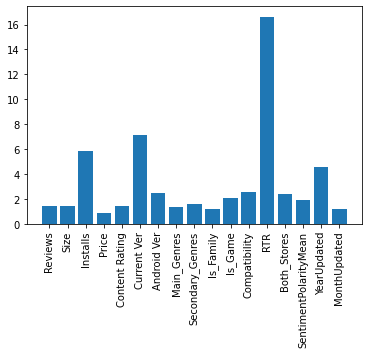

In [49]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(np.arange(len(fs.scores_)),apps.columns[1:], rotation=90)
plt.show()

In [50]:
apps_red = apps.drop(columns = ['Is_Family', 'Reviews', 'Price', 'Main_Genres',
                                'Size', 'MonthUpdated', 'Content Rating'])

In [51]:
class_name = 'Rating'
attributes = [col for col in apps_red.columns if col != class_name]
X_red = apps_red[attributes].values
y_red = apps_red[class_name]

In [52]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42, stratify=y_red)

In [53]:
n_features_red = X_train_red.shape[1]

In [54]:
print('Number of features: ', n_features_red)

Number of features:  10


In [55]:
X_train_red = X_train_red.reshape((X_train_red.shape[0], X_train_red.shape[1], 1))

In [56]:
X_train_red.shape, y_train_red.shape

((5737, 10, 1), (5737,))

In [57]:
CNN4 = Sequential([
    
    Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (n_features_red,1)), 
    
    
    Conv1D(128, kernel_size = 5, activation = 'relu'), 
    MaxPool1D(pool_size = 2),
    
    
    Flatten(),
            
    Dense(64, activation = 'relu'),
    
    Dense(32, activation = 'relu'),
    
    Dense(24, activation = 'relu'),
        
        
    Dense(1)
    
])

In [58]:
CNN4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 8, 64)             256       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 4, 128)            41088     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 24)               

In [59]:
CNN4.compile(optimizer='adam', loss=['mse', 'mae'], metrics=['mse'])

In [124]:
history4 = CNN4.fit(X_train_red, y_train_red, validation_split = 0.3, epochs = 500, batch_size = 100)

Epoch 1/500
41/41 [==============================] - 0s 7ms/step - loss: 47.0465 - mse: 47.0465 - val_loss: 0.5289 - val_mse: 0.5289
Epoch 2/500
41/41 [==============================] - 0s 4ms/step - loss: 0.3881 - mse: 0.3881 - val_loss: 0.3230 - val_mse: 0.3230
Epoch 3/500
41/41 [==============================] - 0s 4ms/step - loss: 0.3487 - mse: 0.3487 - val_loss: 0.3623 - val_mse: 0.3623
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 0.4021 - mse: 0.4021 - val_loss: 1.1846 - val_mse: 1.1846
Epoch 5/500
41/41 [==============================] - 0s 4ms/step - loss: 0.4210 - mse: 0.4210 - val_loss: 0.3450 - val_mse: 0.3450
Epoch 6/500
41/41 [==============================] - 0s 4ms/step - loss: 0.4118 - mse: 0.4118 - val_loss: 0.4089 - val_mse: 0.4089
Epoch 7/500
41/41 [==============================] - 0s 4ms/step - loss: 0.4581 - mse: 0.4581 - val_loss: 0.7558 - val_mse: 0.7558
Epoch 8/500
41/41 [==============================] - 0s 4ms/step - loss: 0.8184 -

Epoch 125/500
41/41 [==============================] - 0s 4ms/step - loss: 0.3246 - mse: 0.3246 - val_loss: 0.3028 - val_mse: 0.3028
Epoch 126/500
41/41 [==============================] - 0s 5ms/step - loss: 0.3003 - mse: 0.3003 - val_loss: 0.3037 - val_mse: 0.3037
Epoch 127/500
41/41 [==============================] - 0s 4ms/step - loss: 0.2981 - mse: 0.2981 - val_loss: 0.3046 - val_mse: 0.3046
Epoch 128/500
41/41 [==============================] - 0s 4ms/step - loss: 0.3045 - mse: 0.3045 - val_loss: 0.2963 - val_mse: 0.2963
Epoch 129/500
41/41 [==============================] - 0s 4ms/step - loss: 0.2988 - mse: 0.2988 - val_loss: 0.3225 - val_mse: 0.3225
Epoch 130/500
41/41 [==============================] - 0s 6ms/step - loss: 0.3247 - mse: 0.3247 - val_loss: 0.4675 - val_mse: 0.4675
Epoch 131/500
41/41 [==============================] - 0s 6ms/step - loss: 0.3338 - mse: 0.3338 - val_loss: 0.2922 - val_mse: 0.2922
Epoch 132/500
41/41 [==============================] - 0s 5ms/step - 

Epoch 248/500
41/41 [==============================] - 0s 4ms/step - loss: 0.3020 - mse: 0.3020 - val_loss: 0.3195 - val_mse: 0.3195
Epoch 249/500
41/41 [==============================] - 0s 4ms/step - loss: 0.2942 - mse: 0.2942 - val_loss: 0.2902 - val_mse: 0.2902
Epoch 250/500
41/41 [==============================] - 0s 6ms/step - loss: 0.2982 - mse: 0.2982 - val_loss: 0.2894 - val_mse: 0.2894
Epoch 251/500
41/41 [==============================] - 0s 5ms/step - loss: 0.2884 - mse: 0.2884 - val_loss: 0.2858 - val_mse: 0.2858
Epoch 252/500
41/41 [==============================] - 0s 4ms/step - loss: 0.2916 - mse: 0.2916 - val_loss: 0.2870 - val_mse: 0.2870
Epoch 253/500
41/41 [==============================] - 0s 5ms/step - loss: 0.2844 - mse: 0.2844 - val_loss: 0.2856 - val_mse: 0.2856
Epoch 254/500
41/41 [==============================] - 0s 4ms/step - loss: 0.2854 - mse: 0.2854 - val_loss: 0.2865 - val_mse: 0.2865
Epoch 255/500
41/41 [==============================] - 0s 6ms/step - 

Epoch 371/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2904 - mse: 0.2904 - val_loss: 0.4343 - val_mse: 0.4343
Epoch 372/500
41/41 [==============================] - 0s 4ms/step - loss: 0.3002 - mse: 0.3002 - val_loss: 0.2952 - val_mse: 0.2952
Epoch 373/500
41/41 [==============================] - 0s 4ms/step - loss: 0.2815 - mse: 0.2815 - val_loss: 0.3021 - val_mse: 0.3021
Epoch 374/500
41/41 [==============================] - 0s 5ms/step - loss: 0.3106 - mse: 0.3106 - val_loss: 0.2819 - val_mse: 0.2819
Epoch 375/500
41/41 [==============================] - 0s 4ms/step - loss: 0.2775 - mse: 0.2775 - val_loss: 0.2907 - val_mse: 0.2907
Epoch 376/500
41/41 [==============================] - 0s 5ms/step - loss: 0.2816 - mse: 0.2816 - val_loss: 0.2819 - val_mse: 0.2819
Epoch 377/500
41/41 [==============================] - 0s 6ms/step - loss: 0.2804 - mse: 0.2804 - val_loss: 0.2816 - val_mse: 0.2816
Epoch 378/500
41/41 [==============================] - 0s 6ms/step - 

Epoch 494/500
41/41 [==============================] - 0s 5ms/step - loss: 0.2693 - mse: 0.2693 - val_loss: 0.2690 - val_mse: 0.2690
Epoch 495/500
41/41 [==============================] - 0s 5ms/step - loss: 0.2689 - mse: 0.2689 - val_loss: 0.2784 - val_mse: 0.2784
Epoch 496/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2584 - mse: 0.2584 - val_loss: 0.2700 - val_mse: 0.2700
Epoch 497/500
41/41 [==============================] - 0s 6ms/step - loss: 0.2629 - mse: 0.2629 - val_loss: 0.3021 - val_mse: 0.3021
Epoch 498/500
41/41 [==============================] - 0s 4ms/step - loss: 0.2667 - mse: 0.2667 - val_loss: 0.2694 - val_mse: 0.2694
Epoch 499/500
41/41 [==============================] - 0s 4ms/step - loss: 0.2616 - mse: 0.2616 - val_loss: 0.2726 - val_mse: 0.2726
Epoch 500/500
41/41 [==============================] - 0s 8ms/step - loss: 0.2595 - mse: 0.2595 - val_loss: 0.2686 - val_mse: 0.2686


In [60]:
X_test_red = X_test_red.reshape((X_test_red.shape[0], X_test_red.shape[1], 1))

In [126]:
y_predcnn3= CNN2.predict(X_test)

print('r on test %s' % pearsonr(np.array(y_test).ravel(), np.array(y_predcnn3.round(1)).ravel())[0])
print('KS on test %s' % ks_2samp(np.array(y_test).ravel(), np.array(y_predcnn3.round(1)).ravel())[0])
print('\n')
print('RMSE test %s' % sqrt(mse(np.array(y_test).ravel(), np.array(y_predcnn3.round(1)).ravel())))
print('MAE test %s' % mae(np.array(y_test).ravel(), np.array(y_predcnn3.round(1)).ravel()))

r on test 0.34089948865766256
KS on test 0.24400162667751119


RMSE test 0.5042882374961485
MAE test 0.34274096529674797


In [ ]:
df = pd.DataFrame()

df['RatingPredict'] = pd.Series(CNN4.predict(X_test_red).round(1).reshape(1,-1)[0])

df['RatingActual'] = pd.Series(np.array(y_test_red))

plt.figure(figsize = (18, 8))
plt.plot(df['RatingPredict'].index, df['RatingPredict'].values, label = 'Predict', linewidth = 0.8, color = '#6473E9')
plt.plot(df['RatingActual'].index, df['RatingActual'].values, label = 'Actual', linewidth = 0.8, color = '#B02E21')
plt.legend()
plt.ylabel('Rating')
plt.xlabel('Test obs.')
plt.savefig('ActualPredict.png')

df.to_csv('PredictActual.csv', index = False)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=df['RatingActual'].values, y=df['RatingPredict'].values, labels={'x': 'Actual', 'y': 'Predict'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=df['RatingActual'].values.min(), y0=df['RatingPredict'].values.min(),
    x1=df['RatingActual'].values.max(), y1=df['RatingPredict'].values.max()
)
fig.show()